### Data Science PROJECT - No-Churn Telecom
* Candidate Name      : Kajal kumari S(PTID-CDS_JUL22-1335)
    
* Candidate E-Mail    : kaajalguptaa77@gmail.com


* CASE STUDY

  * No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. 
Due to new players in the market, telecom industry has become very competitive and
retaining customers becoming a challenge.

  * In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
  * No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

* PROJECT GOAL


  1. Understanding the variables that are influencing the customers
to migrate. 

  2. Creating Churn risk scores that can be indicative to drive
retention campaigns.

  3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.

  * Help to identify possible CHURN-FLAG YES customers and provide
more attention in customer touch point areas, including customer
care support, request fulfilment, auto categorizing tickets as high
priority for quick resolutions any questions they may have etc.,

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import  XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


* Ignoring Warnings:

In [104]:
import warnings
warnings.filterwarnings( 'ignore')

* **Extracting data from mysql server:**

In [105]:
!pip install mysql-connector-python

In [110]:
data

,Tables_in_project_telecom
0,telecom_churn_data


In [111]:
data1 = pd.read_sql('select * from telecom_churn_data',connection )


In [112]:
pd.set_option('display.max_columns',None)

In [113]:
data1.to_csv('churn.csv')

In [114]:
data1

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


* Renaming the columns

In [115]:
new_column_names = {'columns1':'State', 'columns2':'Account_length','columns3':'Area_code',	'columns4':'Phone', 'columns5':'International_plan',	'columns6':'VMail_plan', 'columns7':'Vmail_message',	'columns8':'Day_mins',	'columns9':'Day_calls','columns10':'Day_charge',	'columns11':'Eve_mins','columns12':'Eve_calls',	'columns13':'Eve_charge', 'columns14':'Night_mins','columns15':'Night_calls',	'columns16':'Night_charge',	'columns17':'International_mins',	'columns18':'International_calls',	'columns19':'International_charge',	'columns20':'Cust_serv_calls',	'columns21':'Churn'}

In [116]:
data1.rename(columns=new_column_names,inplace = True)

In [117]:

data1.columns

Index(['State', 'Account_length', 'Area_code', 'Phone', 'International_plan',
       'VMail_plan', 'Vmail_message', 'Day_mins', 'Day_calls', 'Day_charge',
       'Eve_mins', 'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls',
       'Night_charge', 'International_mins', 'International_calls',
       'International_charge', 'Cust_serv_calls', 'Churn'],
      dtype='object')

* **Basic checks**:

In [118]:
data1.head()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [119]:
data1.tail()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [120]:
data1.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account_length,128,107,137,84,75
Area_code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
International_plan,no,no,no,yes,yes
VMail_plan,yes,yes,no,no,no
Vmail_message,25,26,0,0,0
Day_mins,265.1,161.6,243.4,299.4,166.7
Day_calls,110,123,114,71,113
Day_charge,45.07,27.47,41.38,50.9,28.34


In [121]:
data1.shape

(4617, 21)

In [122]:
data1.describe()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,1833,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,169.9,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,10,111,15,10,115,19,81,925,81,1651,3961


In [123]:
data1.dtypes

State                   object
Account_length          object
Area_code               object
Phone                   object
International_plan      object
VMail_plan              object
Vmail_message           object
Day_mins                object
Day_calls               object
Day_charge              object
Eve_mins                object
Eve_calls               object
Eve_charge              object
Night_mins              object
Night_calls             object
Night_charge            object
International_mins      object
International_calls     object
International_charge    object
Cust_serv_calls         object
Churn                   object
dtype: object

In [124]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_length        4617 non-null   object
 2   Area_code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_plan    4617 non-null   object
 5   VMail_plan            4617 non-null   object
 6   Vmail_message         4617 non-null   object
 7   Day_mins              4617 non-null   object
 8   Day_calls             4617 non-null   object
 9   Day_charge            4617 non-null   object
 10  Eve_mins              4617 non-null   object
 11  Eve_calls             4617 non-null   object
 12  Eve_charge            4617 non-null   object
 13  Night_mins            4617 non-null   object
 14  Night_calls           4617 non-null   object
 15  Night_charge          4617 non-null   

In [125]:
data1.nunique()

State                     51
Account_length           218
Area_code                  3
Phone                   4617
International_plan         2
VMail_plan                 2
Vmail_message             47
Day_mins                1901
Day_calls                123
Day_charge              1901
Eve_mins                1833
Eve_calls                125
Eve_charge              1621
Night_mins              1813
Night_calls              130
Night_charge            1012
International_mins       168
International_calls       21
International_charge     168
Cust_serv_calls           10
Churn                      2
dtype: int64

In [126]:
data1.duplicated().sum()

0

In [127]:
data1.isna().sum()

State                   0
Account_length          0
Area_code               0
Phone                   0
International_plan      0
VMail_plan              0
Vmail_message           0
Day_mins                0
Day_calls               0
Day_charge              0
Eve_mins                0
Eve_calls               0
Eve_charge              0
Night_mins              0
Night_calls             0
Night_charge            0
International_mins      0
International_calls     0
International_charge    0
Cust_serv_calls         0
Churn                   0
dtype: int64

**EXPLARATORY DATA ANALYSIS**:

In [128]:
data1.columns

Index(['State', 'Account_length', 'Area_code', 'Phone', 'International_plan',
       'VMail_plan', 'Vmail_message', 'Day_mins', 'Day_calls', 'Day_charge',
       'Eve_mins', 'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls',
       'Night_charge', 'International_mins', 'International_calls',
       'International_charge', 'Cust_serv_calls', 'Churn'],
      dtype='object')

In [129]:
num_data = data1[['Account_length', 'Area_code', 'Phone', 'Vmail_message', 'Day_mins', 'Day_calls', 'Day_charge',
       'Eve_mins', 'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls',
       'Night_charge', 'International_mins', 'International_calls',
       'International_charge', 'Cust_serv_calls']]

UNIVARIATE ANALYSIS :

  *  To check features using various statistical methods and visualizations
   
   *  Missing values
  

In [28]:
!pip install sweetviz


In [29]:
import sweetviz as sv
report = sv.analyze(data1)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


FEATURES:
* STATE:          
 - all unique name of states
* ACCOUNT LENGTH:
 - Length of the account
* AREA CODE:     
 - Code number giving to states
* PHONE:
 - Phone number
* International Plan:
 - YES (International plan is subscribed)
 - NO  (International plan is not subscribed)
* VOICE MAIL PLAN:
 - YES (Subscribtion for voice mail)
 - NO (Not subscribed for voice mail)
* VOICE MAIL MESSAGE  
 - No of voice mail messages ranging from (0 to 50)
* TOTAL DAY MINUTES:
 - Total minutes spent in morning
* TOTAL DAY CALLS:
 - Total no of calls made in morning
* TOTAL DAY CHARGE:
 - Total no of charge to customers
* TOTAL EVE MINUTES:
  - Total minutes spent in evening
* TOTAL EVE CALLS:
 - Total calls made in evening
* TOTAL EVE CHARGE :
  - Total charge to customers in evening
* TOTAL NIGHT MINUTES:
  - Total minutes spent in night
* TOTAL NIGHT CALLS:
  - Total calls made in night
* TOTAL NIGHT CHARGE :
  - Total charge to customers in night
*   INTERNATIONAL MINUTES:
  - Total minutes spent in International calls
* TOTAL INTERNATIONAL CALLS:
  - Total calls made in International service  
* TOTAL INTERNATIONAL CHARGE :
  - Total charge to customers for International Customers
* CUSTOMER SERVICE CALLS:
  - Total no of customer service calls made
* CHURN:
  - TRUE (churned customers)
  - FALSE (retained customers)

### **INSIGHTS FROM UNIVARIATE ANALYSIS :**



*  **3% of customers** are from **WV**(west virginia) state

*  **Most** of the **states** are other states with **60%**.
* And rest of the states are 2%.
* **50%** of **area code** is **415**.
* Area code with 408 and 510 are **25%**.
* **90%** of customers have **not** taken **International plan.**
* Only 10% have subscribed International plan.
* **27%** of customers have **voice mail subscribtion** anfd the rest 73% have not subscribed.
* zero voice mail messege are seen in 73% of customers.
* **Highest minutes** spent in day is **154 minutes**, which is found in less than 1% of customers.
* **102 calls** is the **highest** number of **calls made in a day**
* **26.18** is the **highest charge** in a day.
* **Highest minutes** spent in evening is **169.9 minutes**.
* **111 no of customers** do evening calls, which is **2% of customers** and is highest.
* 14.25 is the charge paid many times
* **194.3 minutes** is highly occured **night minutes**.
* **115 customers** did **105 night calls** that is the highest no of calls.
* Less than 1% of customers have night charges.
* Mostly occured **international minutes** is **9.8 minutes**.
* **20%** of customers(925)  has done **3 international calls**.
* Highly occured international charge is 2.65.
* 365 customers had 1 survey call.
* **86% of customers**  will **not churn** or leave , the rest **14% will churn**.

**DATA PREPROCESSING**

* PHONE

 * Column "Phone" has unwanted non digit character
 * We will remove using Regular Expression method

In [130]:
data1['Phone'] = data1['Phone'].str.replace(r'\D', '')

In [131]:
data1.Phone.dtype

dtype('O')

* Here we label encode columns with categorical data

*  Columns to be encoded for further analysis of dataset using label encodeing:

    * State
    * International_plan
    * VMail_plan
    * Churn

In [132]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
columns_to_be_labelled =['State','International_plan','VMail_plan','Churn']
for column in columns_to_be_labelled:
    data1[column] = LE.fit_transform(data1[column])

In [133]:
data1.dtypes

State                    int32
Account_length          object
Area_code               object
Phone                   object
International_plan       int32
VMail_plan               int32
Vmail_message           object
Day_mins                object
Day_calls               object
Day_charge              object
Eve_mins                object
Eve_calls               object
Eve_charge              object
Night_mins              object
Night_calls             object
Night_charge            object
International_mins      object
International_calls     object
International_charge    object
Cust_serv_calls         object
Churn                    int32
dtype: object

* Coverting few numeric datatype columns into integer, which are represented as object type


In [134]:
numeric_columns = data1.columns[1:]
data1[numeric_columns] = data1[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [135]:
data1.dtypes

State                     int32
Account_length            int64
Area_code                 int64
Phone                     int64
International_plan        int32
VMail_plan                int32
Vmail_message             int64
Day_mins                float64
Day_calls                 int64
Day_charge              float64
Eve_mins                float64
Eve_calls                 int64
Eve_charge              float64
Night_mins              float64
Night_calls               int64
Night_charge            float64
International_mins      float64
International_calls       int64
International_charge    float64
Cust_serv_calls           int64
Churn                     int32
dtype: object

**MODELLING**:

* SPLITTING INDEPENDENT NAD DEPENDENT VARIABLE

In [136]:
data1.head()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn
0,16,128,415,3824657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,3717191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,3581921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,3759999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,3306626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [137]:
X=data1.iloc[:,0:-1]  #independent variable
y=data1.Churn

* X - Independent variables
* Y - Dependent variable

In [138]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3693, 20) (3693,) (924, 20) (924,)


BALANCING THE DATA

In [140]:
sc=SMOTE()
X_smote,Y_smote=sc.fit_resample(X_train,y_train)

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_smote,Y_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(featurescores.nlargest(5,'Scores'))

    feature_names       Scores
7        Day_mins  9516.341908
6   Vmail_message  3235.996233
9      Day_charge  1617.724836
10       Eve_mins  1126.708428
5      VMail_plan   530.520796


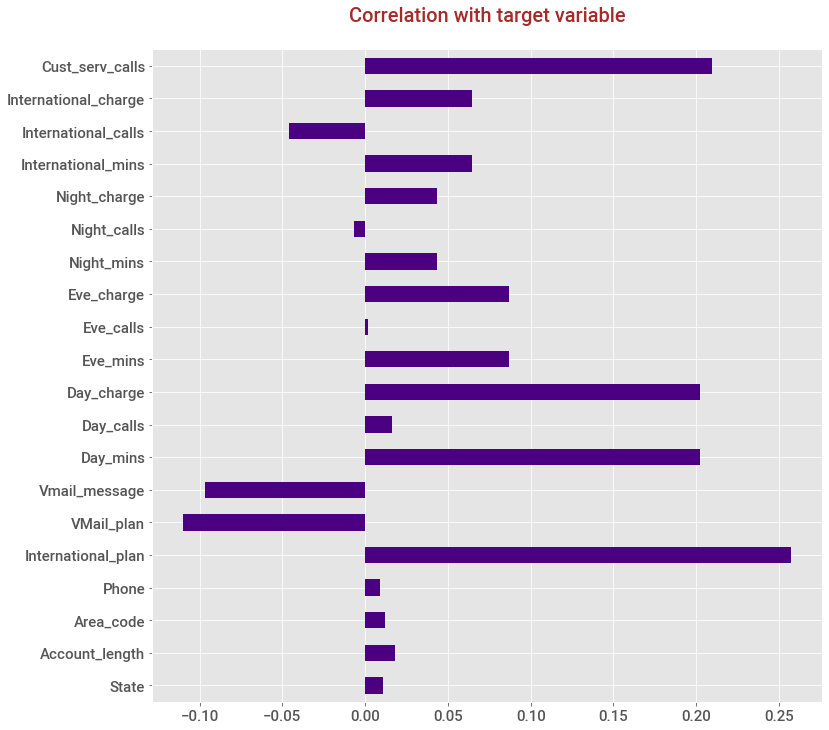

In [142]:
plt.style.use('ggplot')
ax = X.corrwith(y).plot(kind='barh', grid=True, figsize=(12,12),color='indigo')
plt.title("Correlation with target variable\n", size=20,color="brown")
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.label.set_color('purple')
ax.yaxis.label.set_color('brown')
plt.show()

### * Columns that impact target variable in positive way

* International plan 
* customer service calls 
* Day mins
* Day charge 

**FEATURE SELECTION**

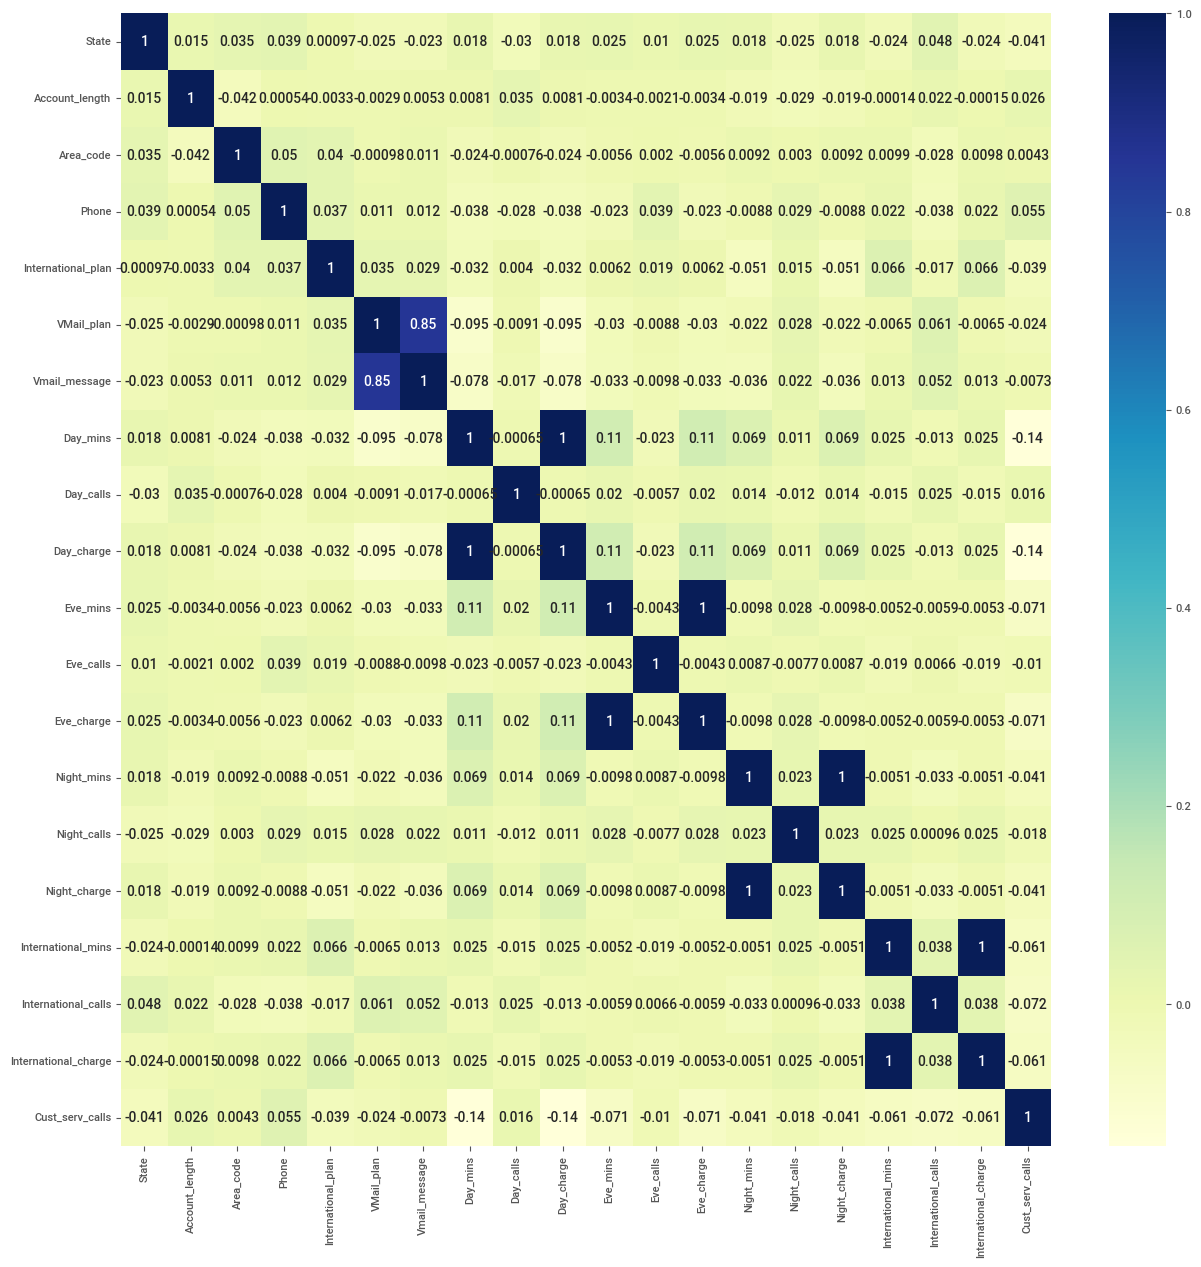

In [43]:
plt.figure(figsize=(15,15))
cor = X_smote.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

* Above features impact (target variable) to churn
* Lets drop any 3 features, as there show highly correlated features
    

In [143]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [144]:
data1.shape

(4617, 21)

In [145]:
corr_features = correlation(X_smote, 0.9)
len(set(corr_features))

4

In [146]:
corr_features

{'Day_charge', 'Eve_charge', 'International_charge', 'Night_charge'}

* Dropping highly correlated features:

In [147]:
X_smote.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Eve_mins,Eve_calls,Night_mins,Night_calls,International_mins,International_calls,Cust_serv_calls
2264,10,18,408,3946382,0,0,0,197.0,97,203.7,107,202.0,105,8.7,3,3
1839,1,70,415,3457014,0,0,0,230.3,110,77.9,87,247.1,105,13.2,4,1
2525,42,95,510,3657784,0,0,0,174.0,57,281.1,118,197.2,94,9.7,2,0
23,40,111,415,3502565,0,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2
1831,35,93,415,3979184,0,1,42,152.3,90,267.5,102,266.9,130,11.3,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,13,137,510,3486721,0,0,0,203.1,97,132.0,76,250.9,94,9.2,4,4
4537,37,100,415,3886108,0,1,31,67.7,67,147.1,116,288.3,103,12.3,2,6
1965,34,139,510,3997268,0,0,0,236.6,109,169.9,107,212.3,118,11.1,2,1
2114,43,123,408,4166594,0,0,0,260.9,85,168.5,103,178.3,91,13.3,5,3


**TRAINING AND TESTING OF DATA**

Now we've got our data splitted into training and testing sets, it's time to build a machine learning model.

We'll Train it (finding patterns) on the training set.

and then test it testing set

selecting a model from : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

after having a look I found some model to work with.

We're going to try 6 different Machine Learning Model:
1. `Logistic Regression`
2. `K-Nearest neighbours Classifer`
3. `RandomForestClassifer`
4. `SVC Classifier`
5. `XGBOOST Classifier`
6. `SGD Classifier`
7. `MlP Classifier`
8. `Radial Basis Function`
9. `Naive Bayes Classifier`


In [148]:
LR=LogisticRegression()
LR.fit(X_smote.drop(corr_features,axis=1),Y_smote)#fit train data

LogisticRegression()

In [149]:
print(LR.intercept_) #line intercept

[0.]


In [150]:
y_log_pred=LR.predict(X_test.drop(corr_features,axis=1))

In [151]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       799
           1       0.00      0.00      0.00       125

    accuracy                           0.86       924
   macro avg       0.43      0.50      0.46       924
weighted avg       0.75      0.86      0.80       924



* Classification Report

In [152]:
pd.crosstab(y_test,y_log_pred)

col_0,0
Churn,
0,799
1,125


In [153]:
y_prob=LR.predict_proba(X_test.drop(corr_features,axis=1))[:,1] # predict proba for class 1

In [154]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_prob)

In [155]:
roc_auc = roc_auc_score(y_test,y_prob)
print('roc-curve',roc_auc)


roc-curve 0.49541927409261577


In [156]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.3f)' % roc_auc)#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

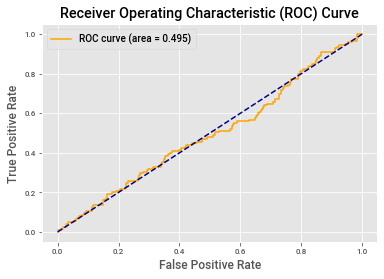

In [157]:
plot_roc_curve(fpr, tpr)#plotting ruc curve

In [158]:
# Putting Models in a Dictionary to make our function more dynamic

models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Xgboost":XGBClassifier(),
    "SGD":SGDClassifier(),
    "NB":GaussianNB(),
    "MLP":MLPClassifier(),
}

# Create a function to fit and score models
def fit_and_score(models, X_smote, X_test, Y_smote, y_test):
  """
  Fits and evaluate given machine learning models.
  Models: a dictionary of diccerent sklearn Machine Learnng Models
  X_train : Training data (no labeles)
  X_test : Testing data (no labels)
  y_train : Training labels
  y_test : Test labels
  """
  # Setting up Random seeds
  np.random.seed(42)
  # Make a dictionary to keep model scores
  model_scores ={}
  # Loop through models
  for name, model in models.items():
    # Fit the model to data
    model.fit(X_smote.drop(corr_features,axis=1), Y_smote)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test.drop(corr_features,axis=1),y_test)
  return model_scores

In [159]:
model_scores = fit_and_score(models=models,
                             X_smote=X_smote,
                             X_test=X_test,
                             Y_smote = Y_smote,
                             y_test = y_test)

In [160]:
model_scores

{'Logistic Regression': 0.8647186147186147,
 'KNN': 0.566017316017316,
 'Random Forest': 0.9101731601731602,
 'SVC': 0.3051948051948052,
 'Xgboost': 0.935064935064935,
 'SGD': 0.8647186147186147,
 'NB': 0.6071428571428571,
 'MLP': 0.8647186147186147}

Let's visulaize the model comparision before goin any further

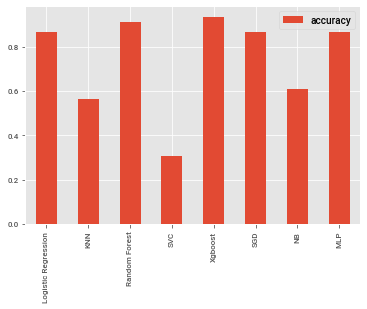

In [161]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see `XGBoost Classification`, performs best while `KNN`,`SVC` and `SGD Classification` and was slightly behind and `Random Forest`was perform good.

but still, model's first predictions aren't always what we should based our next step off.

so let's do Hyperparameter Tuning

# Hyper Tuning

 ## Logistic Regression

In [88]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [89]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LoisticRegression
rs_log_reg.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [90]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [92]:
rs_log_reg.score(X_test.drop(corr_features,axis=1),y_test)

0.6893939393939394

After Tuning Logistic Regression, we got the best score as **0.68** as less than before tuning

## Stochastic Gradient Descent

In [80]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

eta0 = [1, 10, 100]

In [81]:
param_distributions = dict(loss=loss,
penalty=penalty,
alpha=alpha,
learning_rate=learning_rate,

eta0=eta0)

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [93]:
np.random.seed(42)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
random = RandomizedSearchCV(estimator=sgd,
param_distributions=param_distributions,
scoring='roc_auc',
verbose=1, n_jobs=-1,
n_iter=1000)

In [94]:
random_result = random.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [95]:
random_result.best_params_

{'penalty': 'elasticnet',
 'loss': 'log',
 'learning_rate': 'optimal',
 'eta0': 100,
 'alpha': 10}

In [96]:
np.random.seed(42)
sgd1=SGDClassifier(penalty='l2',
 loss = 'modified_huber',
 learning_rate = 'optimal',
 eta0 = 10,
 alpha = 1)

In [97]:
sgd1.fit(X_smote.drop(corr_features,axis=1),Y_smote)

SGDClassifier(alpha=1, eta0=10, loss='modified_huber')

In [98]:
sgd1.score(X_test.drop(corr_features,axis=1),y_test)

0.8647186147186147

After Tuned Stochastic Gradient Descent and got best score as **0.86** , which is same as before tuning.

## Random Forest Classification

In [62]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [63]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False]


params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap

}


In [64]:
np.random.seed(42)
RC1=RandomForestClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [65]:
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3,
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(X_smote.drop(corr_features,axis=1),Y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [66]:
RS.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_split=3,
                       n_estimators=400)

In [67]:
RS.best_params_ #best_params

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [68]:
np.random.seed(42)
model_RC=RandomForestClassifier(max_features='sqrt', min_samples_leaf=1,max_depth= 10,
                       min_samples_split=2, n_estimators=1400,bootstrap=True) #fit with best_params
model_RC.fit(X_smote.drop(corr_features,axis=1), Y_smote)

RandomForestClassifier(max_depth=10, n_estimators=1400)

In [69]:
model_RC.score(X_test.drop(corr_features,axis=1),y_test)

0.9004329004329005

After Random Forest Classification Tuned and got best score as **0.90** as less than before tuning.

## XGBOOST Classification

In [63]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [64]:
np.random.seed(42)
XG=XGBClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [65]:
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3,
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                                  2.4024024024024024,
                                                  2.5025025025025025,
                                                  2.6026026026026026,
                                                  2.702702702702703,
                                                  2.802802802802803,
                                                  2.902902902902903, ...],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.05, 0.1, 0.2,
                                                          0.300000012, 0.4,
                                                          0.5],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, scoring='f1', verbose=3)

In [66]:
Xg_RS.best_estimator_ #best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5005005005005005, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
Xg_RS.best_params_ #best_params

{'n_estimators': 75,
 'max_depth': 10,
 'learning_rate': 0.300000012,
 'gamma': 0.5005005005005005}

In [68]:
xg_boost=XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31, random_state=42)
xg_boost.fit(X_smote.drop(corr_features,axis=1), Y_smote) #fit

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2002002002002002, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=31, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
xg_boost.score(X_test.drop(corr_features,axis=1),y_test)

0.9307359307359307

## Multilayer Perceptron Classification

In [162]:
model_mlp = MLPClassifier(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       activation='relu',
                       random_state=42) ## model object creation max_iter=Stopping parameter
model_mlp.fit(X_smote.drop(corr_features,axis=1),Y_smote) ## training the data
y_predict_proba_mlp = model_mlp.predict_proba(X_test.drop(corr_features,axis=1)) ## predicting the pro
## bability of class
y_predict_mlp = model_mlp.predict(X_test.drop(corr_features,axis=1))
y_train_predict_mlp = model_mlp.predict(X_smote.drop(corr_features,axis=1))

In [163]:
model_mlp.score(X_test.drop(corr_features,axis=1),y_test)

0.8647186147186147

* ADDING A NEW COLUMN NAMED **churn_risk** to predict probability of getting churn after testing 

In [95]:

X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(['Churn'], axis=1), data1['Churn'], test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


cols_to_drop = []
X_test_for_prediction = X_test.drop(cols_to_drop, axis=1)

churn_probabilities = xgb_model.predict_proba(X_test_for_prediction)[:, 1]
X_test['Churn_Risk'] = (churn_probabilities >= 0.5).astype(int)
X_test

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn_Risk
2264,10,18,408,3946382,0,0,0,197.0,97,33.49,203.7,107,17.31,202.0,105,9.09,8.7,3,2.35,3,0
1839,1,70,415,3457014,0,0,0,230.3,110,39.15,77.9,87,6.62,247.1,105,11.12,13.2,4,3.56,1,0
2525,42,95,510,3657784,0,0,0,174.0,57,29.58,281.1,118,23.89,197.2,94,8.87,9.7,2,2.62,0,0
23,40,111,415,3502565,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
1831,35,93,415,3979184,0,1,42,152.3,90,25.89,267.5,102,22.74,266.9,130,12.01,11.3,5,3.05,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,13,137,510,3486721,0,0,0,203.1,97,34.53,132.0,76,11.22,250.9,94,11.29,9.2,4,2.48,4,0
4537,37,100,415,3886108,0,1,31,67.7,67,11.51,147.1,116,12.50,288.3,103,12.97,12.3,2,3.32,6,1
1965,34,139,510,3997268,0,0,0,236.6,109,40.22,169.9,107,14.44,212.3,118,9.55,11.1,2,3.00,1,0
2114,43,123,408,4166594,0,0,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,0


In [98]:
data1 = data1.merge(X_test[['Churn_Risk']], left_index=True, right_index=True)
data1

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn,Churn_Risk
8,18,117,408,3354719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
12,12,168,408,3631107,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0,0
14,12,62,415,3669238,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1
17,46,93,510,3862923,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0
19,43,73,415,3732782,0,0,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,26,127,408,3426864,0,0,0,271.2,110,46.10,213.5,80,18.15,201.8,102,9.08,13.2,4,3.56,0,1,1
4605,44,80,415,3618630,0,0,0,195.1,65,33.17,214.0,80,18.19,124.4,96,5.60,9.2,6,2.48,2,0,0
4607,23,76,415,3776340,0,0,0,168.4,74,28.63,161.0,83,13.69,147.4,117,6.63,8.0,4,2.16,1,0,0
4613,32,177,408,3436820,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0,0


* Here we added "CHURN_FLAG" column with yes and no 

In [101]:
data1['CHURN_FLAG'] = data1['Churn_Risk'].apply(lambda x: 'YES' if x == 1 else 'NO')
data1

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,Vmail_message,Day_mins,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,Cust_serv_calls,Churn,Churn_Risk,CHURN_FLAG
8,18,117,408,3354719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,NO
12,12,168,408,3631107,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0,0,NO
14,12,62,415,3669238,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1,YES
17,46,93,510,3862923,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0,NO
19,43,73,415,3732782,0,0,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,26,127,408,3426864,0,0,0,271.2,110,46.10,213.5,80,18.15,201.8,102,9.08,13.2,4,3.56,0,1,1,YES
4605,44,80,415,3618630,0,0,0,195.1,65,33.17,214.0,80,18.19,124.4,96,5.60,9.2,6,2.48,2,0,0,NO
4607,23,76,415,3776340,0,0,0,168.4,74,28.63,161.0,83,13.69,147.4,117,6.63,8.0,4,2.16,1,0,0,NO
4613,32,177,408,3436820,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0,0,NO


# Result :

#### PROJECT SUMMARY:

* Variables influencing the customers to migrate:
    
    * Customers service calls are impacting more to churn, so it is necessary to aims and investigate what aspects of the service is provided 
    
    * International_calls - Analyze the current pricing structure for different time periods and international calls.
    
    * Day_charge,Eve_Charge - Introduce special packages or offers that provide better value for money, especially during peak usage times.
    
    * Actively seek feedback from customers to understand their concerns and pain points related to charges.
    
    * Highlight the benefits of different services and plans to justify the charges.

<table>
  <tr>
    <th>S No</th>
    <th>Algorithm</th>
    <th>Accuracy score</th>
     <th>Accuracy score after tunning </th>
  </tr>
  <tr>
    <td>1</td>
    <td>Logistic Regression</td>
    <td>0.86</td>
    <td>0.68</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Stochastic Gradient Descent</td>
    <td>0.86</td>
    <td>0.86</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Random Forest Classification</td>
    <td>0.91</td>
    <td>0.90</td>
  </tr>
  <tr>
    <td>4</td>
    <td>XGBOOST Classification</td>
    <td>0.93</td>
    <td>0.93</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Multilayer perceptron</td>
    <td>0.86</td>
    <td>0.86</td>
  </tr>
</table>

## **Conclusion** :


  *  From the above result table , we can conclude that **Random forest classification and XGBOOST classification** gives high accuracy of **0.91 and 0.93**.
  
  * Thus we conclude that our model **XGBoost Classifier** performed with an accuracy of **93%**, which is the best fit model for customer churn.   
  
  * By addressing these influential factors, No-Churn Telecom can effectively reduce customer churn and enhance customer retention.
  
  * Churn_flag column will help implementing targeted retention campaigns to encourage customers to stay with the telecom operator.
  
This understanding can help the company retain its customer base and maintain a competitive edge in the industry.